In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./Datasets/spam.csv')

In [4]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [6]:
df['Spam'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(df.Message,df.Spam,test_size=0.3)

In [9]:
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.model_selection import cross_val_score

In [12]:
X_train_count.shape

(3900, 7151)

In [13]:
y_train.shape

(3900,)

In [14]:
mnb = cross_val_score(MultinomialNB(),X_train_count,y_train,cv=3)

In [15]:
bnb = cross_val_score(BernoulliNB(),X_train_count,y_train,cv=3)

In [16]:
X_train_dense = X_train_count.toarray()

In [17]:
gnb = cross_val_score(GaussianNB(),X_train_dense,y_train,cv=3)

In [18]:
import matplotlib.pyplot as plt

In [39]:
bnb.shape

(3,)

In [19]:
mnb_avg = sum(mnb)/len(mnb)
bnb_avg = sum(bnb)/len(bnb)
gnb_avg = sum(gnb)/len(gnb)

In [20]:
mnb_avg

0.9797435897435897

In [21]:
bnb_avg

0.9723076923076923

Text(0, 0.5, 'Average Accuracy Score')

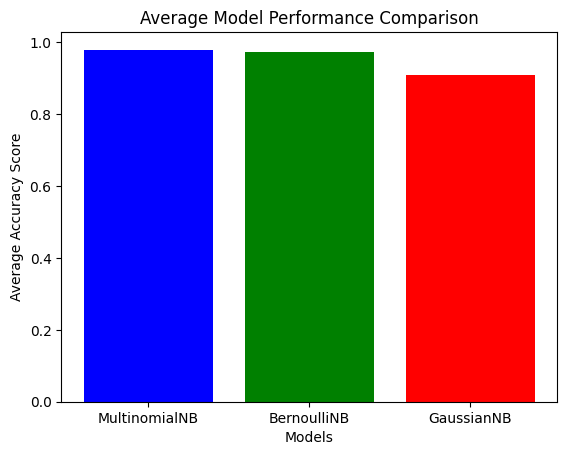

In [22]:
models = ['MultinomialNB', 'BernoulliNB', 'GaussianNB']
scores = [mnb_avg,bnb_avg,gnb_avg]
%matplotlib inline
plt.bar(models, scores, color=['blue', 'green', 'red'])

# Adding title and labels
plt.title('Average Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Average Accuracy Score')

From the plot it is visible that Multinomial model works a bit better than Bernouli while Gaussian works the least

In [23]:
clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [24]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [25]:
clf.score(X_test,y_test)

0.9844497607655502

In [26]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

In [27]:
clf.predict(emails)

array([0, 1], dtype=int64)

Model ready now getting the interface ready

In [28]:
import gradio as gr

In [61]:
def predict_email(email):
    prediction = clf.predict([email]) 
    return "Spam" if prediction==1 else "Not Spam"

In [62]:
interface = gr.Interface(
    fn=predict_email,
    inputs="text",
    outputs="text",
    title="Spam Detector",
    description="Enter a message to check if it's Spam or Not Spam."
)


In [63]:
interface.launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


In [29]:
import joblib

In [30]:
joblib.dump(clf,'model.pkl')

['model.pkl']